In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('shopping_data.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID',axis=1,inplace=True)

In [5]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [7]:
df.drop('Genre',axis=1,inplace=True)

In [8]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [9]:
df.drop('Age',axis=1,inplace=True)

In [10]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [11]:
import scipy.cluster.hierarchy as shc

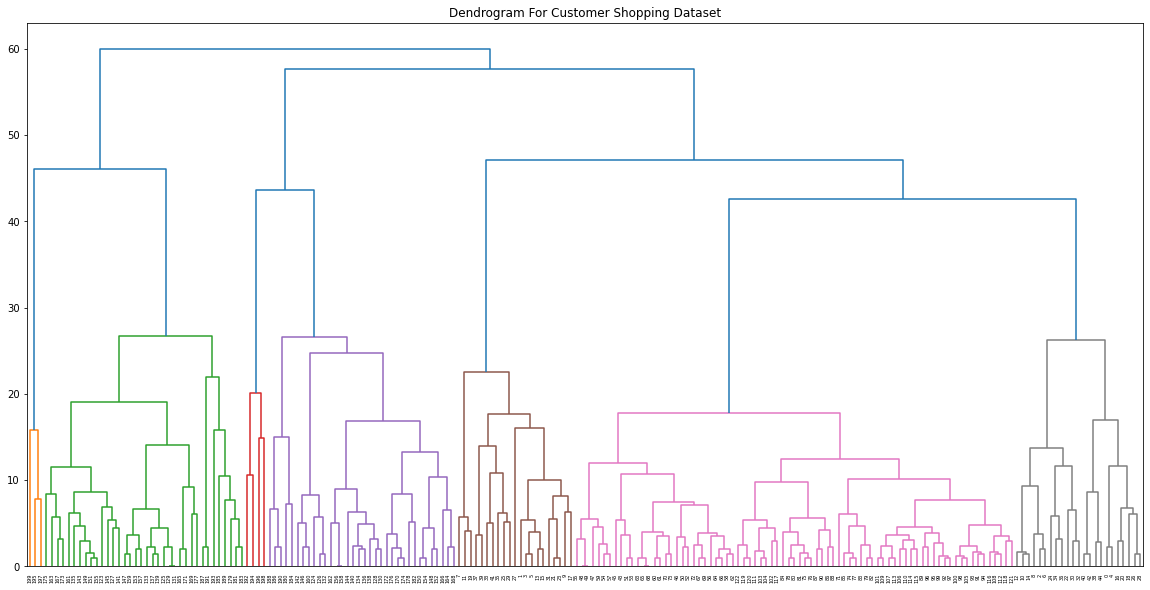

In [15]:
plt.figure(figsize=(20,10))
plt.title('Dendrogram For Customer Shopping Dataset')

dend = shc.dendrogram(shc.linkage(df,method='average'))

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
agglo_model = AgglomerativeClustering(n_clusters=7,
                                     affinity='manhattan',
                                     linkage='average')

In [18]:
agglo_model.fit(df)

AgglomerativeClustering(affinity='manhattan', linkage='average', n_clusters=7)

In [20]:
agglo_model.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 6, 2, 6, 5, 6, 5,
       6, 5], dtype=int64)

In [21]:
df['cluster_labels']=agglo_model.labels_

In [22]:
df.head()

,Annual Income (k$),Spending Score (1-100),cluster_labels
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1


In [23]:
df.cluster_labels.value_counts()

4    80
2    36
0    34
1    23
3    20
6     4
5     3
Name: cluster_labels, dtype: int64

In [25]:
print(len(df.cluster_labels))

200


Text(0, 0.5, 'Spending Score of the Customer')

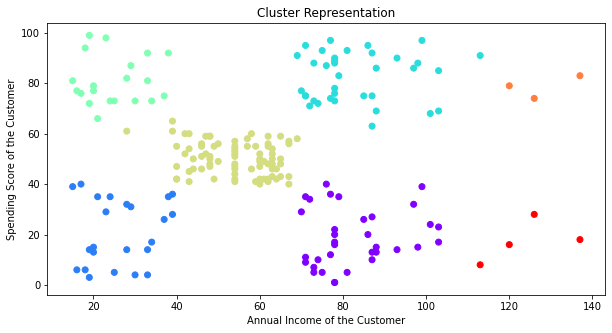

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=df['cluster_labels'],cmap='rainbow')
plt.title('Cluster Representation')
plt.xlabel('Annual Income of the Customer')
plt.ylabel('Spending Score of the Customer')